In [1]:
%load_ext autoreload
%autoreload 2

# Resoto jupyter notebook showcase

Welcome to Resoto!

This is a showcase of how you can interact with resoto using jupyter notebooks.

To get started, let's install the resotonotebook library first (uncomment the next line if you execute this notebook for the first time):

In [2]:
# ! pip install --upgrade pip resotonotebook

After the installation, we need a few imports:

In [3]:
from resotonotebook import ResotoNotebook

The main interface is the `ResotoNotebook` class. It provides the methods to search the graph and visualize the results.

To create the `ResotoNotebook` object, we need to pass the URI of the resotocore and a pre shared key (PSK). If you started the resotocore without the `--psk` option (e.g. in your local setup), you can pass None as the PSK: 

In [4]:
rnb = ResotoNotebook("https://localhost:8900", None)

Once we have the `ResotoNotebook` object, we can start performing searches.



### Full text search

For example, we can search all resources for a property with value foobar:

In [5]:
rnb.search('"foobar"')

,kind,id,tags,name,urn,ctime,age,account_id,region_id,cloud_id
0,digitalocean_tag,foobar,{},foobar,do:tag:foobar,2022-04-12 11:53:47+00:00,19d20h,10923436,None,do


Or using the cli command:

In [6]:
rnb.cli_execute('search "foobar"')

,kind,id,tags,name,urn,ctime,age,account_id,region_id,cloud_id
0,digitalocean_tag,foobar,{},foobar,do:tag:foobar,2022-04-12 11:53:47+00:00,19d20h,10923436,None,do


### Counting

Get number of all collected instances by kind

In [7]:
rnb.search("is(instance)").groupby(["kind"])["kind"].count()

kind
aws_ec2_instance        497
digitalocean_droplet      7
example_instance          2
gcp_instance             12
Name: kind, dtype: int64

Using the cli command:

In [8]:
rnb.cli_execute("search is(instance) | count kind")

,0
0,example_instance: 2
1,digitalocean_droplet: 7
2,gcp_instance: 12
3,aws_ec2_instance: 497
4,total matched: 518
5,total unmatched: 0


### Searching by kind

Get list of all the DigitalOcean droplets:

In [9]:
rnb.search("is(digitalocean_droplet)")

,kind,id,tags,name,ctime,instance_cores,instance_memory,instance_type,instance_status,urn,droplet_backup_ids,is_locked,droplet_features,age,account_id,region_id,cloud_id,droplet_image
0,digitalocean_droplet,289061880,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtx,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061880,[],False,"[droplet_agent, private_networking]",1mo28d,10225075,ams3,do,NaN
1,digitalocean_droplet,289061881,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wto,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061881,[],False,"[droplet_agent, private_networking]",1mo28d,10225075,ams3,do,NaN
2,digitalocean_droplet,289061882,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtj,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061882,[],False,"[droplet_agent, private_networking]",1mo28d,10225075,ams3,do,NaN
3,digitalocean_droplet,291923577,{},ubuntu-s-1vcpu-1gb-ams3-01,2022-03-23 12:50:45+00:00,1,1024,,unknown,do:droplet:291923577,[],False,"[droplet_agent, private_networking]",1mo8d,10923436,ams3,do,ubuntu-20-04-x64
4,digitalocean_droplet,294614223,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxul,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614223,[],False,[private_networking],22d17h,10225075,fra1,do,NaN
5,digitalocean_droplet,294614225,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxut,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614225,[],False,[private_networking],22d17h,10225075,fra1,do,NaN
6,digitalocean_droplet,294614226,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxu6,2022-04-09 15:07:11+00:00,2,4096,,running,do:droplet:294614226,[],False,[private_networking],22d17h,10225075,fra1,do,NaN


Using the cli command:

In [10]:
rnb.cli_execute("search is(digitalocean_droplet)")

,kind,id,tags,name,ctime,instance_cores,instance_memory,instance_type,instance_status,urn,droplet_backup_ids,is_locked,droplet_features,age,account_id,region_id,cloud_id,droplet_image
0,digitalocean_droplet,289061882,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtj,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061882,[],False,"[droplet_agent, private_networking]",1mo28d,10225075,ams3,do,NaN
1,digitalocean_droplet,289061881,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wto,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061881,[],False,"[droplet_agent, private_networking]",1mo28d,10225075,ams3,do,NaN
2,digitalocean_droplet,289061880,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtx,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061880,[],False,"[droplet_agent, private_networking]",1mo28d,10225075,ams3,do,NaN
3,digitalocean_droplet,294614226,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxu6,2022-04-09 15:07:11+00:00,2,4096,,running,do:droplet:294614226,[],False,[private_networking],22d17h,10225075,fra1,do,NaN
4,digitalocean_droplet,294614223,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxul,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614223,[],False,[private_networking],22d17h,10225075,fra1,do,NaN
5,digitalocean_droplet,294614225,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxut,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614225,[],False,[private_networking],22d17h,10225075,fra1,do,NaN
6,digitalocean_droplet,291923577,{},ubuntu-s-1vcpu-1gb-ams3-01,2022-03-23 12:50:45+00:00,1,1024,,unknown,do:droplet:291923577,[],False,"[droplet_agent, private_networking]",1mo8d,10923436,ams3,do,ubuntu-20-04-x64


### Visualization

Render the acounts as an svg graph:

In [11]:
from IPython.display import display_png as render_png, display_svg as render_svg

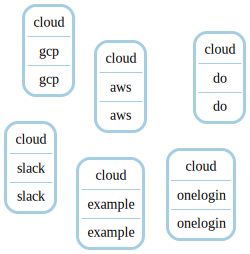

In [12]:
render_svg(rnb.graph("is(cloud)"))

Make a graph of all clouds with name do and their successors one level deep and render it as a PNG image:

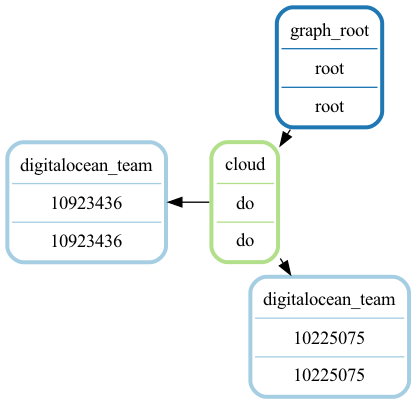

In [13]:
render_png(rnb.graph("is(cloud) and name=do <-[0:1]->"))

Show the instances/cores/creation time heatmap:

In [51]:
import plotly.express as px
data = rnb.search("is(instance)")
px.density_heatmap(data, x="account_id", y="instance_cores") 

### Selecting properties

Get list of name, type, cores, and memory for each instance:

In [17]:
rnb.search("is(instance)")[["instance_type","instance_cores", "instance_memory"]]

,instance_type,instance_cores,instance_memory
0,e2-standard-16,16,64.00
1,n1-standard-4,4,15.00
2,e2-standard-16,16,64.00
3,n1-standard-1,1,3.75
4,,2,8192.00
...,...,...,...
513,t2.medium,2,4.00
514,m5.2xlarge,8,32.00
515,m5.2xlarge,8,32.00
516,,4,32.00


Using the cli command:

In [18]:
rnb.cli_execute("search is(instance) | list instance_type, instance_cores as cores, instance_memory as memory, /ancestors.account.reported.name as account")

,0
0,"instance_type=m5.4xlarge, cores=16, memory=64,..."
1,"instance_type=m5.4xlarge, cores=16, memory=64,..."
2,"instance_type=m5.4xlarge, cores=16, memory=64,..."
3,"instance_type=m5.4xlarge, cores=16, memory=64,..."
4,"instance_type=m5.4xlarge, cores=16, memory=64,..."
...,...
513,"instance_type=e2-standard-16, cores=16, memory..."
514,"instance_type=e2-standard-16, cores=16, memory..."
515,"instance_type=e2-standard-16, cores=16, memory..."
516,"instance_type=e2-standard-16, cores=16, memory..."


Get a list of instance IDs and their creation times:

In [19]:
rnb.search("is(instance)")[["id", "ctime"]]

,id,ctime
0,1074059568844956228,2022-03-16 03:42:36+00:00
1,1290767193704005938,2018-04-20 01:18:21+00:00
2,1353728928419473180,2022-03-16 03:30:59+00:00
3,156642789561794498,2018-04-20 01:23:58+00:00
4,289061880,2022-03-03 09:20:38+00:00
...,...,...
513,i-0fe60d340a9954fa6,2019-10-04 14:34:51+00:00
514,i-0ff599989ea08e402,2022-04-25 23:19:00+00:00
515,i-0ffbda8eb32897978,2020-08-27 18:41:14+00:00
516,someInstance1,2022-04-26 01:02:50+00:00


Using the cli command:

In [20]:
rnb.cli_execute('search is(instance) | list id, ctime')

,0
0,"id=i-065af67d77cd5a272, ctime=2019-03-12T17:21..."
1,"id=i-019f3f3a2a8d1990e, ctime=2019-03-12T17:22..."
2,"id=i-0667dc8de49a4319e, ctime=2019-03-12T17:22..."
3,"id=i-076b9763c755a9b51, ctime=2019-03-12T17:22..."
4,"id=i-074fcfe526f95c9fd, ctime=2019-03-12T17:22..."
...,...
513,"id=8995932377571976788, ctime=2022-03-16T03:25..."
514,"id=1353728928419473180, ctime=2022-03-16T03:30..."
515,"id=1074059568844956228, ctime=2022-03-16T03:42..."
516,"id=785157051786257304, ctime=2022-03-16T03:45:59Z"


### Filtering

Get list of all compute instances with more than two CPU cores:

In [23]:
rnb.search("is(instance) and instance_cores > 2")['id']

0      1074059568844956228
1      1290767193704005938
2      1353728928419473180
3       419678222777377802
4      6304874975645721945
              ...         
458    i-0fcfab8577ff3838b
459    i-0fdedced1ad62e89b
460    i-0ff599989ea08e402
461    i-0ffbda8eb32897978
462          someInstance1
Name: id, Length: 463, dtype: object

Get list volumes that are not in use, larger than 10GB, older than 30 days. 


In [30]:
rnb.search("is(volume) and volume_status != in-use and volume_size > 10 and age > 30d")['id']

0       10231946733915195
1     1187704278967958860
2     1323135876407226528
3     1399984592326388343
4     1425309235655562935
             ...         
94    8874124991960765941
95    8905146741875910405
96    9082245625223045849
97    9172374453082511230
98    9213175237926489244
Name: id, Length: 99, dtype: object

### Aggregation
Count the number of instances by account ID:

In [41]:
rnb.search("is(instance)").groupby(["account_id"])["account_id"].count()

account_id
15e1db0c90556d39dcf82aff3a71ff79     32
1f9e45c3383045dd36c363b971f0ebc5    121
3952aea55166c926c697eb8a23c23891     44
4189a55c3a9ea507e92823fa49d07bac     67
47097842aa65aac3333838773c5d9dab     45
515e3adc7fe72a8d38d02d125a84785d      1
5c362c78030c244b92b9b7ca1600c4ba      6
5d9b9ebdd511fa5f57c9d56817158839      1
6baf7bca3649aaf96440be85a17ea718      7
6e67770ac4e8e642fb43003d84d7c5e0      2
7945b67f00e00aadc09705c978b84bb3     13
79c89adf68f53d2ff3f4bd6e41b227ac      1
883b8eec0b12eca780907e713a271ec7     30
bab2ce2f28991087879fb2ae2f6de4cf      6
c1962dd1b9dbdff5150f638b5450efb7     56
c24aa952190cd0d79ee705ab29604b0a      5
c41aba4ba55638094017d6725bc85c90      5
da82cc12b0b6f9dd689f127d591303d1      2
e4fd307c4993a20d6eec29b5e9fbac91     18
e53ab526acb9cb43a9e249d9255f995a     46
e7b1d1d376181047ff2f453863683f57      1
f123e52be71b0e2786090c8f5f8c3bdf      7
ff21bcae70a1f9be31411c2555d32c3f      2
Name: account_id, dtype: int64

Aggregate RAM usage (bytes) data grouped by cloud, region, and instance type:

In [44]:
rnb.search("is(instance) and instance_status == running") \
    .groupby(["cloud_id", "region_id", "instance_type"], as_index=False)[["instance_cores"]] \
    .sum()

,cloud_id,region_id,instance_type,instance_cores
0,aws,eu-central-1,m5.2xlarge,16
1,aws,eu-central-1,m5.xlarge,6
2,aws,us-east-1,m4.2xlarge,448
3,aws,us-east-1,m5.2xlarge,80
4,aws,us-east-1,m5.xlarge,44
5,aws,us-east-1,m5a.large,2
6,aws,us-east-1,t2.medium,6
7,aws,us-east-1,t2.xlarge,16
8,aws,us-west-2,c5.2xlarge,48
9,aws,us-west-2,c5.4xlarge,32


Using the cli:

In [45]:
query = """
search is(instance) and instance_status == running | aggregate
  /ancestors.cloud.reported.name as cloud,
  /ancestors.region.reported.name as region,
  instance_type as type: sum(instance_memory) as memory_bytes
  """
rnb.cli_execute(query)

,memory_bytes,group.cloud,group.region,group.type
0,384,gcp,us-central1,e2-standard-16
1,4,gcp,us-central1,e2-medium
2,32,example,US West,
3,12288,do,Frankfurt 1,
4,24576,do,Amsterdam 3,
5,64,aws,us-east-1,t2.xlarge
6,64,aws,us-west-2,c5.4xlarge
7,4,aws,us-west-2,t2.medium
8,4,aws,us-west-2,t3.small
9,122,aws,us-west-2,p2.xlarge
